# Part I - (Prosper Loan Data Exploration)
## by (Abadom Emeka)

## Introduction

>This dataset is a financial dataset that contains informations related to the loan, borrowers, lenders, interest rates for Prosper Marketplace.  Prosper Marketplace Inc. is a San Francisco, California company that specializes in loans at low interest rates to the borrowers. The dataset contains various information about loan applicants and about their loan applications.


## Preliminary Wrangling


In [162]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [163]:
#Load in the data
loan_data = pd.read_csv("prosperLoanData.csv")

In [164]:
# high-level overview of data shape and composition
print(loan_data.shape)

(113937, 81)


In [165]:
loan_data.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [166]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [167]:
variables_of_interest = ["LoanStatus","BorrowerRate","ListingCategory (numeric)","EmploymentStatus",
                        "Occupation", "IsBorrowerHomeowner", "ProsperRating (Alpha)", "ProsperScore",
                        "IncomeVerifiable","IncomeRange", "StatedMonthlyIncome","Investors", "LP_NetPrincipalLoss"]
loan_data[variables_of_interest].describe()

,BorrowerRate,ListingCategory (numeric),ProsperScore,StatedMonthlyIncome,Investors,LP_NetPrincipalLoss
count,113937.000000,113937.000000,84853.000000,1.139370e+05,113937.000000,113937.000000
mean,0.192764,2.774209,5.950067,5.608026e+03,80.475228,681.420499
std,0.074818,3.996797,2.376501,7.478497e+03,103.239020,2357.167068
min,0.000000,0.000000,1.000000,0.000000e+00,1.000000,-954.550000
25%,0.134000,1.000000,4.000000,3.200333e+03,2.000000,0.000000
50%,0.184000,1.000000,6.000000,4.666667e+03,44.000000,0.000000
75%,0.250000,3.000000,8.000000,6.825000e+03,115.000000,0.000000
max,0.497500,20.000000,11.000000,1.750003e+06,1189.000000,25000.000000


### What is the structure of your dataset?

> This dataset contains 113937 loan applications and 81 variables(informations) on each particular application. Most of the variables are numeric. 

### What is/are the main feature(s) of interest in your dataset?

 The variables explored in the dataset include
* LoanStatus: The current status of the loan
* BorrowerRate : The Borrower’s interest rate for this loan.
* ListingCategory..numeric. : Prosper rating for borrowers in numbers
* EmploymentStatus : Current type of employment
* LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
* Occupation : Occupation of borrower at the time of listing
* IsBorrowerHomeowner : Does the borrower owns house at the time of listing (True & False)
* ProsperRating(Alpha). : Prosper rating for borrowers in alphabets
* ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being best, or   lowest risk score.
* IncomeVerifiable : If the income of the borrower is verifiable at the time of listing (True & False)
* IncomeRange: The income range of the borrower at the time the listing was created.
* StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created. 
* Investors: The number of investors that funded the loan.
* LP_NetPrincipalLoss: The principal that remains uncollected after any recoveries.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that borrowers with good ratings to comply with their loan repayment. I also anticipate to see a correlation between number of investors and loan applications with good ratings and scores

In [168]:
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A', 'B', 'C', 'D', 'E', 'HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999',
                                     '$0', 'Not employed','Not displayed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_data[var] = loan_data[var].astype(ordered_var)

## Univariate Exploration




### Question: What does the distribution of the borrowers rate look like?

### Visualisation:

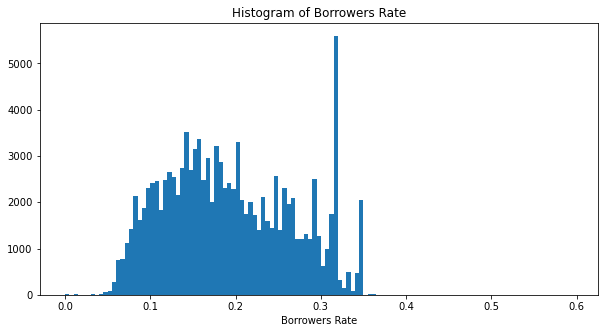

In [169]:
#Distribution of Borrower APR
bins = np.arange(0, loan_data['BorrowerRate'].max()+0.1, 0.005)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = "BorrowerRate", bins = bins);
plt.title("Histogram of Borrowers Rate")
plt.xlabel("Borrowers Rate")
plt.show()

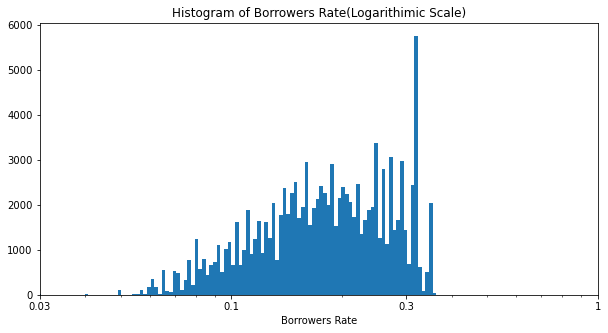

In [170]:
#Log scaling of the Borrowers APR
bins = 10 ** np.arange(-2.18, np.log10(loan_data['BorrowerRate'].max()) + 0.005, 0.01)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = "BorrowerRate", bins = bins);
plt.xscale('log')
plt.title("Histogram of Borrowers Rate(Logarithimic Scale)")
plt.xlim(0.03,0.50)
plt.xticks([0.03, 0.1, 0.3, 1], ["0.03", "0.1", "0.3", "1"])
plt.xlabel("Borrowers Rate")
plt.show()

### Observations:
 The Borrowers APR which looks multimodal models a normal distribution with a spike around the values of 35% and 40%. When plotted on a log-scale, the distribution still looks similar save for the modal spikes that looks more evident. This tells us that a lot of Loan applicants have their Borrowers rate around that range. This could be due to low credit score amidst other factors. 

### Question: What does the spike in the Borrowers APR mean?

### Visualisation:

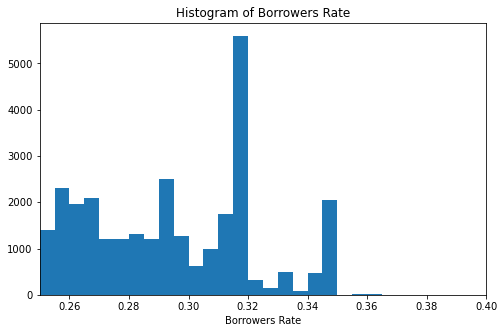

In [171]:
#Taking a deeper look into spike within 0.35 and 0.4
bins = np.arange(0, loan_data['BorrowerRate'].max()+0.1, 0.005)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = "BorrowerRate", bins = bins);
plt.xlim(0.25,0.4)
plt.title("Histogram of Borrowers Rate")
plt.xlabel("Borrowers Rate")
plt.show()


The visual above showes a spike around 32%. This means that a lot of Borrowers rate is around 32%. According to Forbes, average APR range from around 4% to 36%, with the average hovering around 10% to 13%. 

### Question: How much are lenders making from their loan investments? 

### Visualisation:

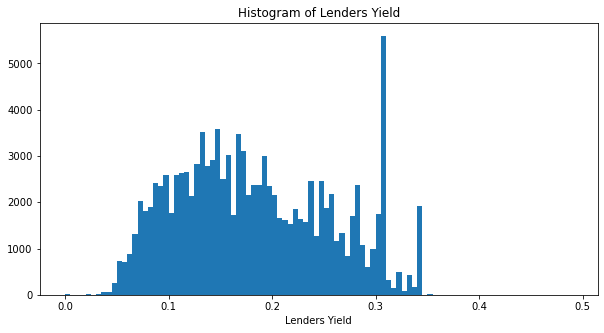

In [172]:
#Distribution of Lenders Yiel
bins = np.arange(0, loan_data['LenderYield'].max(), 0.005)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = "LenderYield", bins = bins);
plt.title("Histogram of Lenders Yield")
plt.xlabel("Lenders Yield")
plt.show()

### Observations:
   The Lenders Yield histogram is multimodal with long spike around the 30%. Interestingly, the Histogram of the Borrowers APR looks similar to that of Lenders yield. Taking a look at the correlation between both variables, we observe a 99% correlation meaning they mean almost the exact same thing.

In [173]:
loan_data["BorrowerRate"].corr(loan_data["LenderYield"])

0.9992113306509374

### Questions: Why do people take loans?

Researches have shown that the most popular reason why people take loans is to pay back previous loans. The visuals above coincides with this theory. Most reasons why the loan was collected was debt consolidation. second highest reason was unavailable and third was other reasons. This also shows that most loan collectors where not comfortable disclosing their reasons for taking loans.  Among other viable reasons, we see that people mostly take loans for home improvement and business. 

### Visualisations:

In [174]:
listing_map = {0: "Not Available",1: "Debt Consolidation", 2 : "Home Improvement", 3: "Business", 4: "Personal Loan",
          5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption", 9: "Boat", 10 : "Cosmetic Procedure",
          11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 14 : "Large Purchases", 
          15 : "Medical/Dental", 16: "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20: "Wedding Loans"}

loan_data["Listing Category"] = loan_data["ListingCategory (numeric)"].map(listing_map)


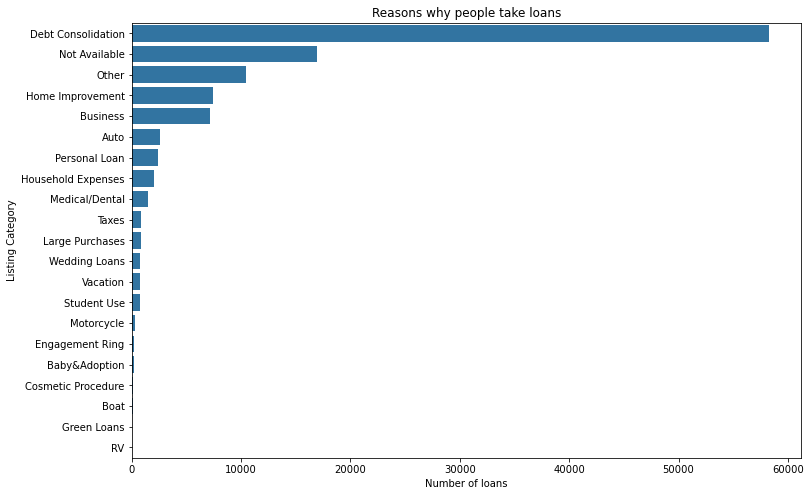

In [175]:
order = loan_data[ "Listing Category"].value_counts().index
base_color = sb.color_palette()[0]
plt.figure(figsize=[12, 8]);
sb.countplot(data = loan_data, y = "Listing Category", order = order, color =  base_color);
plt.title("Reasons why people take loans");
plt.ylabel("Listing Category");
plt.xlabel("Number of loans");


### Observations: People taking loans to pay back loans.

Researches have shown that the most popular reason why people take loans is to pay back previous loans. The visuals above coincides with this theory. Most reasons why the loan was collected was debt consolidation. second highest reason was unavailable and third was other reasons. This also shows that most loan collectors where not comfortabke disclosing their reasons for taking loans. Among other viable reasons, we see that people mostly take loans for home improvement and business.

### Question: Which profession seems to take loans the most?

### Visualisation:

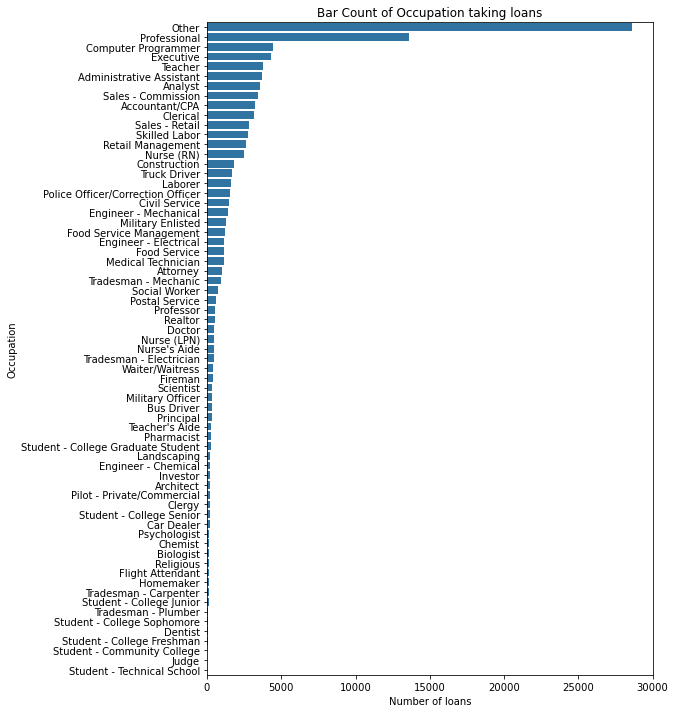

In [176]:
order = loan_data["Occupation"].value_counts().index
plt.figure(figsize=[8, 12])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, y = "Occupation", order = order, color = base_color)
plt.title("Bar Count of Occupation taking loans");
plt.xlabel("Number of loans");


### Observations:
After the two topmost categories other and professional which do not give much information on the actual professions of the applicants, Computer programmers and executives take loans the most.Also,  Students find themsleves at the lower end of the bar chart, Obviously students are less likely to take loans than some others 

### Question: How often do people default on their loans?

### Visualisation:

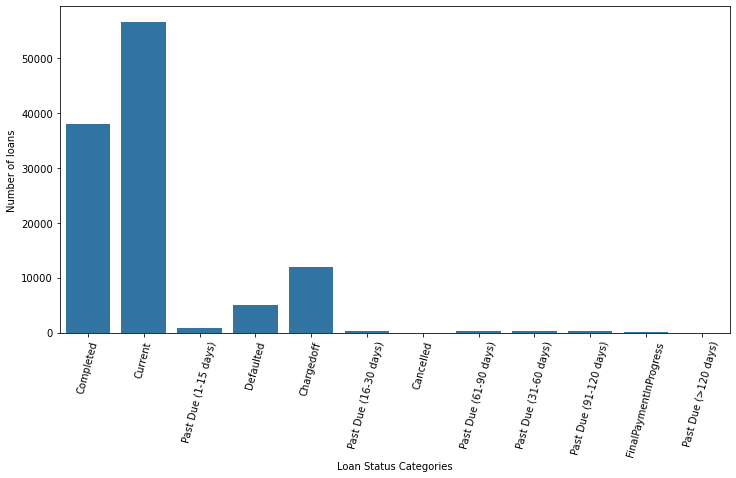

In [177]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = "LoanStatus", color = base_color);
plt.xticks(rotation = 75);
plt.ylabel("Number of loans");
plt.xlabel("Loan Status Categories");

In [178]:
loan_status = pd.DataFrame(loan_data["LoanStatus"].value_counts(normalize = True)).reset_index()
loan_status.columns = ["Loan Category", "Percentages"]

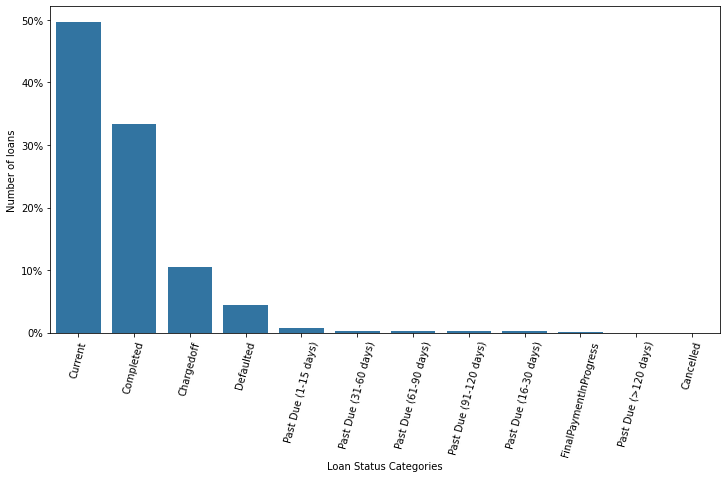

In [179]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]
ax = sb.barplot(data = loan_status, x = "Loan Category", y = "Percentages", color = base_color);
plt.xticks(rotation = 75);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.ylabel("Number of loans");
plt.xlabel("Loan Status Categories");

About 35% of the loan applicants have completed their loans and about 50% still currently ongoing. The remaining is spread mainly across those who have defaulted at different levels.

In [180]:
loan_status_without_current = loan_data[loan_data["LoanStatus"] != "Current"]
loan_status_without_current_df = pd.DataFrame(loan_status_without_current["LoanStatus"].value_counts(normalize = True)).reset_index()
loan_status_without_current_df.columns = ["Loan Category", "Percentages"]

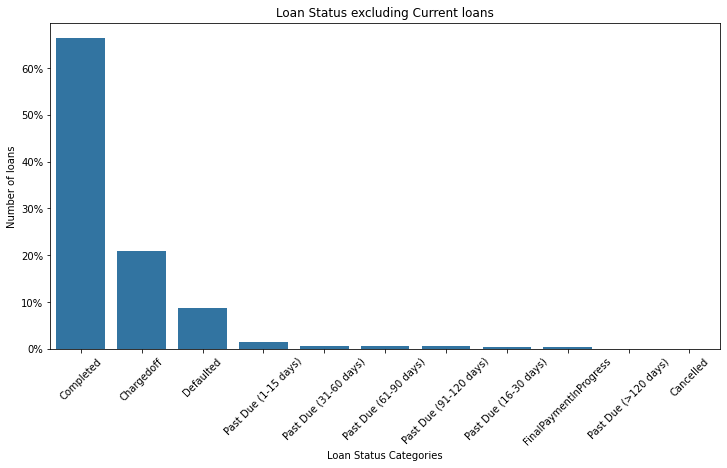

In [181]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[0]
ax = sb.barplot(data = loan_status_without_current_df, x = "Loan Category", y = "Percentages", color = base_color);
plt.xticks(rotation = 45);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title("Loan Status excluding Current loans");
plt.ylabel("Number of loans");
plt.xlabel("Loan Status Categories");

### Observations:
Excluding Current loan applications, defaulted takes 8% while completed takes 66% out of 57361 loan applications. 20% of the loan are considered to be charged off(Bad Debt) which is really high. We take futher look at application features that could help us point to possible reasons and indicators.

### Question:  Does Good Income give better access to loans?

### Visualisation

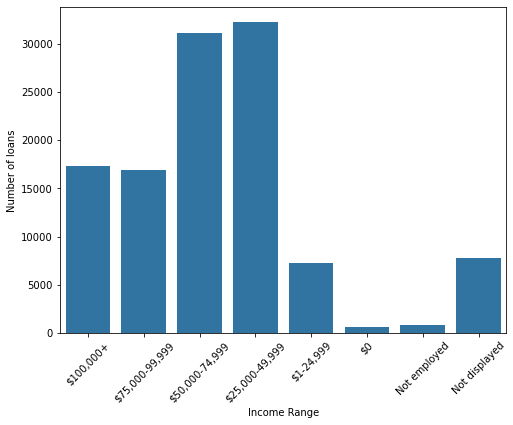

In [182]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = "IncomeRange", color = base_color);
plt.xticks(rotation = 45);
plt.xlabel("Income Range");
plt.ylabel("Number of loans");

### Observation:
 We note that hose within the 25000 - 75000 income bracket applied for loan the most. We observe low percentage of loan applicants within people whose income bracket is below $25000. This might be due to the fact that there applications were not successful loans due to their financial status.

### Question: Which rating gets the most loan?

### Visualisation:

Text(0.5, 0, 'Ratings')

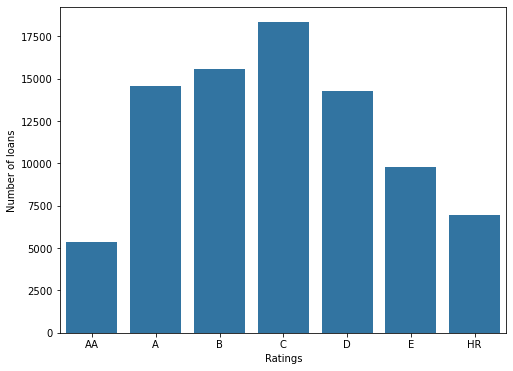

In [183]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = "ProsperRating (Alpha)", color = base_color);
plt.ylabel("Number of loans");
plt.xlabel("Ratings")

### Observations:
C has the highest number of loan applications with AA being the lowest. C is an average rating. The resasons fro this might be that most people with the AA ratings might not really be in need for a loan and most loan applications with HR ratings might not be approved thus most loan approved applications would come from those with AA ratings. This is probably because most AA rated applicants might not really need loans. C as evident has the highest number of loans


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> When investigating the Borrowers APR, The distribution looked multimodal with an unusual spike around 35% t0 40%.When plotted on a log-scale, the distribution lstill looks multimodal with the spike evident.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When looking at the distribution of different occupations. Noticed "Other" and "Professional", two categories that did not give much information based on occupation took most of the data. Opted to leave it soas not to lose valuable insights in other variables.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question: Is there correlation among the pairs?

### Visualisation:

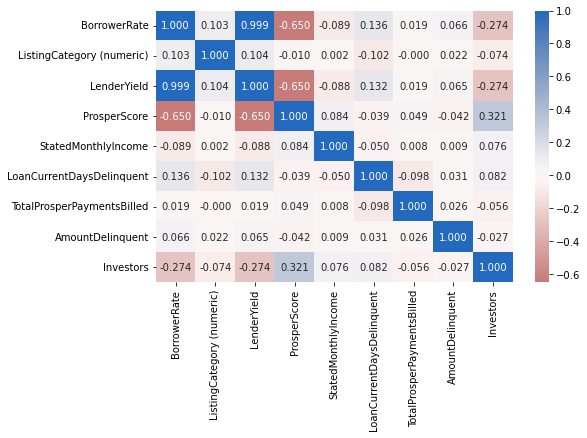

In [184]:
numeric_vars = ["BorrowerRate","ListingCategory (numeric)","LenderYield","ProsperScore", "StatedMonthlyIncome", 
                "LoanCurrentDaysDelinquent","TotalProsperPaymentsBilled", "AmountDelinquent", "Investors"]
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Observation: 
As stated before, Borrowers rate and lenders yield give a perfect correlation. This is not suprising as they mean almost the same thing. Lender yield is equal to the Borrowers Rate on the loan minus the servicing fee. 

We also observe, a strong negative correlation between Borrowers Rate and prosper score. This will require a deeper dive as we progress. Notably, is a mild negative correlation between Borrowers Rate and investors and also a positive correlation between investors and prosper score

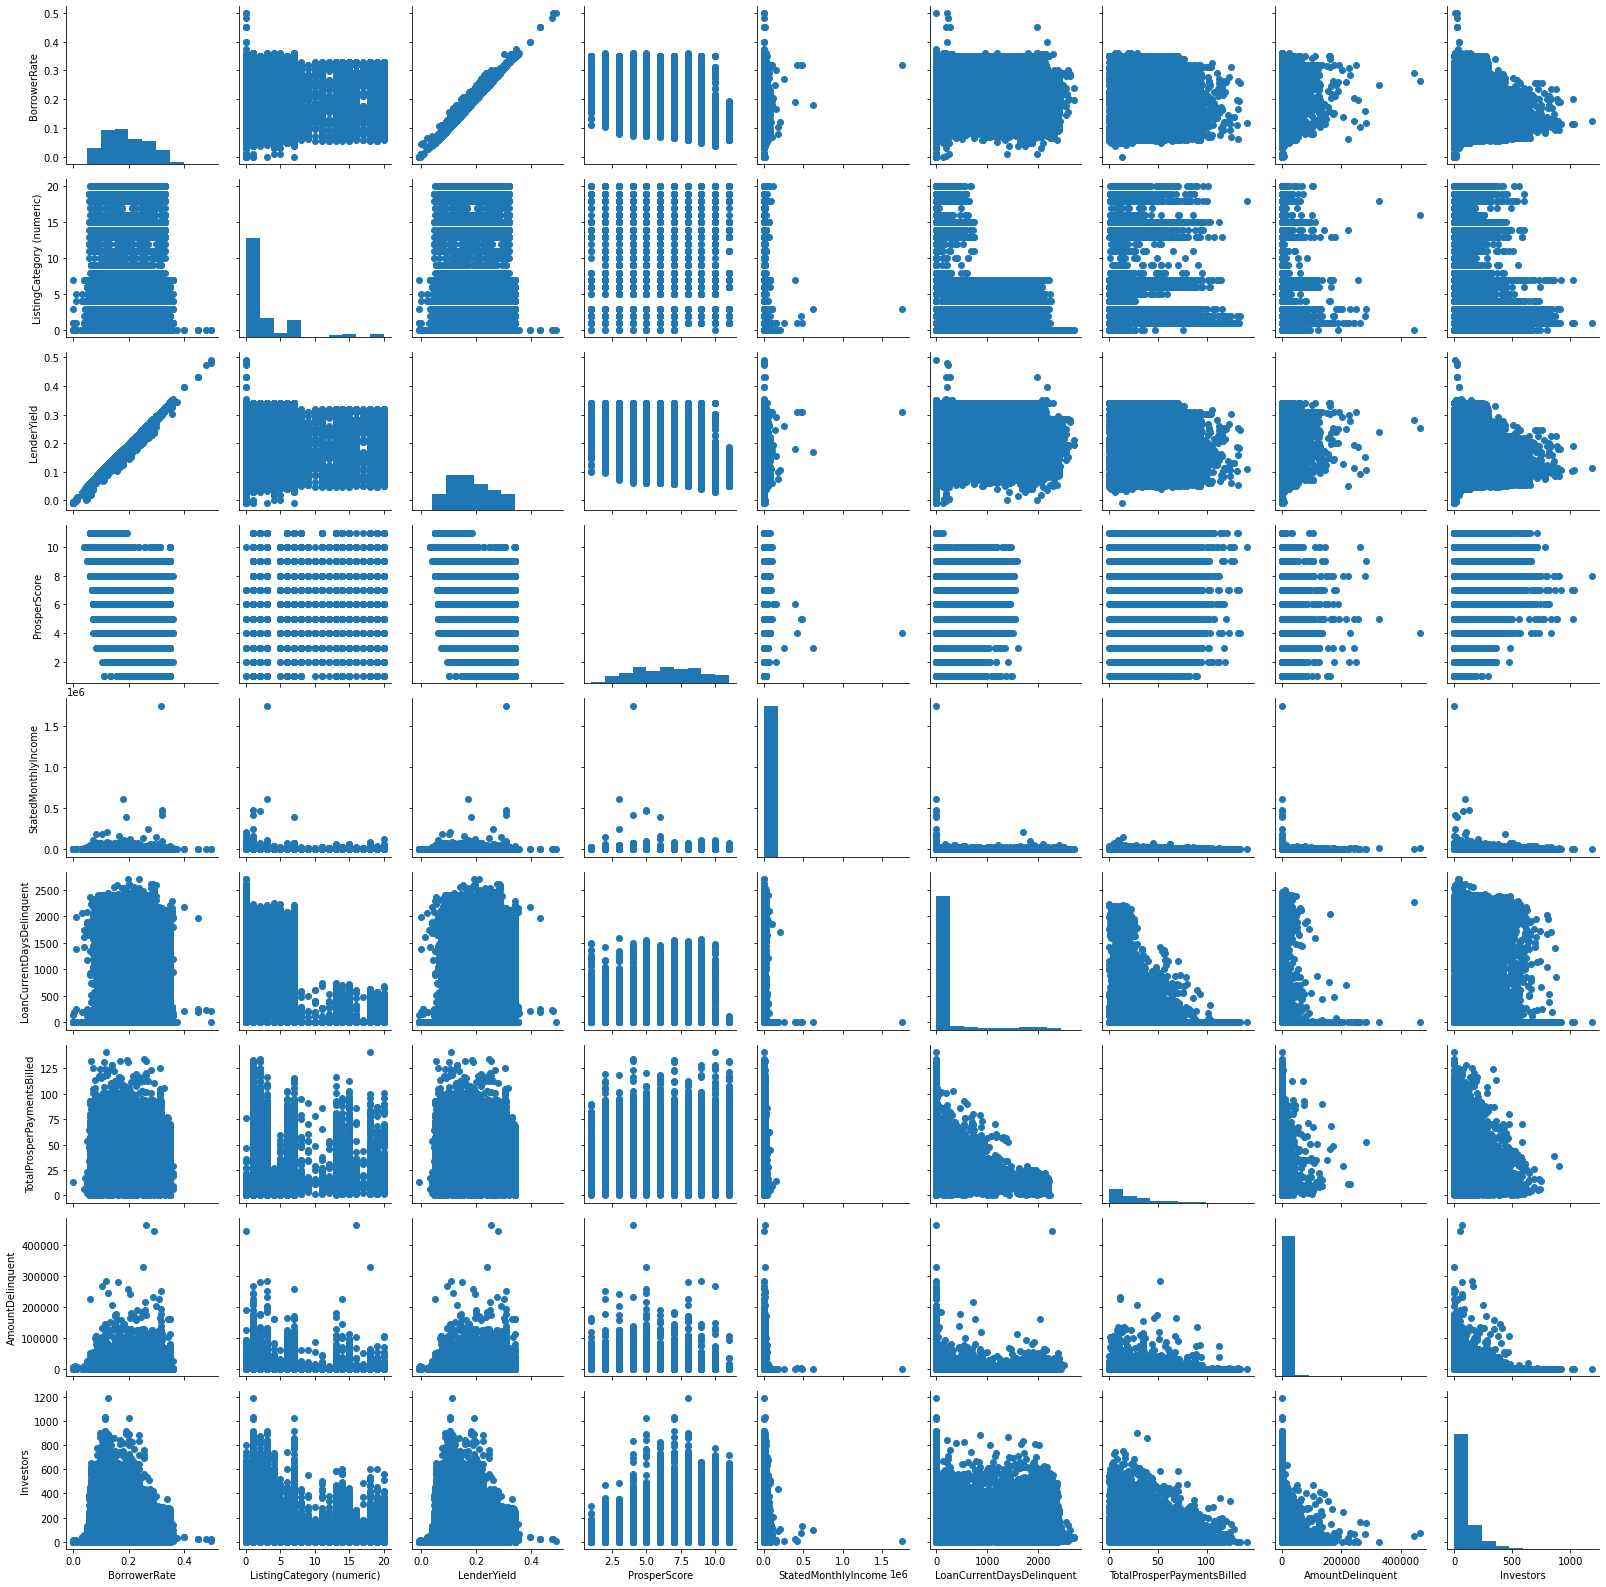

In [185]:
g = sb.PairGrid(data = loan_data, vars = numeric_vars);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

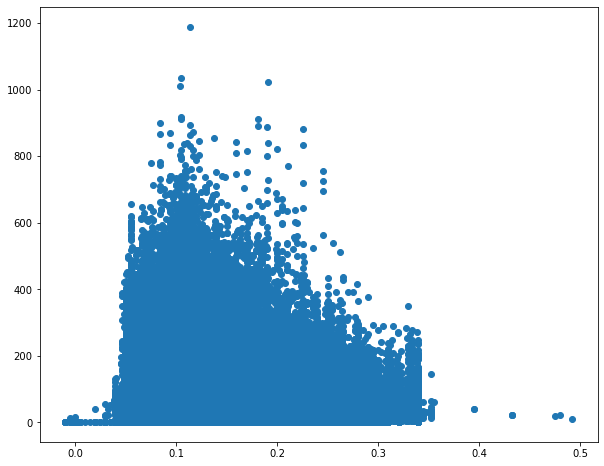

In [186]:
plt.figure(figsize = (10,8))
plt.scatter(data = loan_data, y = 'Investors', x = 'LenderYield')

### Question: Does better ratings influence borrowers rate?

It appears that there is a negative relationship between borrowers rate and the prosper rating. We see a rise in average borrowers rate as the ratings move from best to worst. This implies that people with AA ratings get loans at the best rates. We observe lots of outliers on all the different categories of ratings. These outliers might point to the fact that ratings alone do not influence the borrowers rate. As expected, we also see a negative relationship between borrowers rate and prosper score.

### Visualisation:

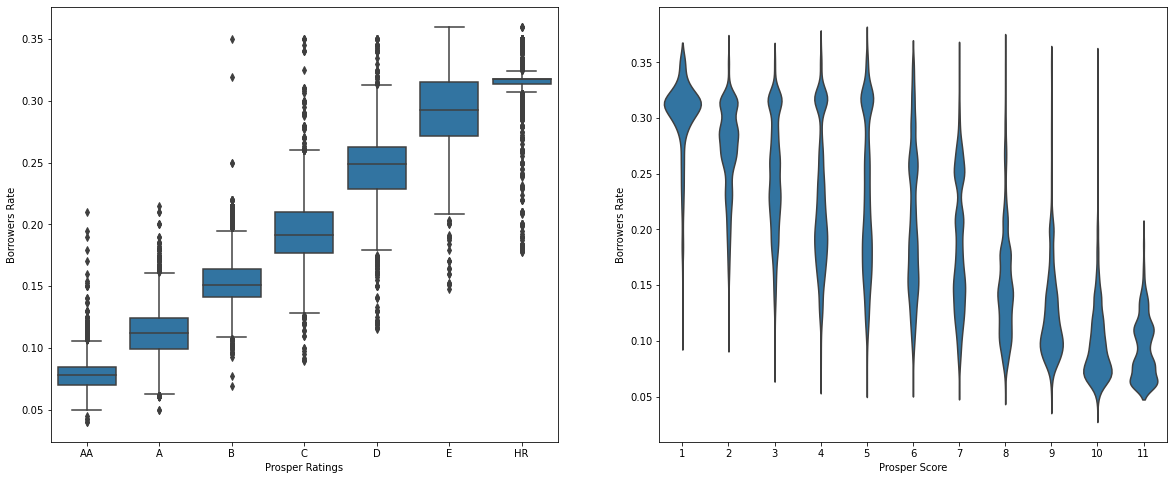

In [187]:
## Box plot for Borrowers Rate of different ratings
plt.figure(figsize = [20, 8])


plt.subplot(1,2,1)
base_color = sb.color_palette()[0];
sb.boxplot(data=loan_data, x="ProsperRating (Alpha)", y='BorrowerRate', color = base_color);
plt.ylabel("Borrowers Rate");
plt.xlabel("Prosper Ratings");


plt.subplot(1,2,2)
base_color = sb.color_palette()[0];
sb.violinplot(data=loan_data, x="ProsperScore", y='BorrowerRate', color = base_color, inner = None);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],["1","2","3","4","5","6","7","8","9","10","11"]);
plt.ylabel("Borrowers Rate");
plt.xlabel("Prosper Score");


### Observation
The prosper ratings range from AA,A,B,C,D,E,HR from the best to the worst ratings while the prosper score ranges from 1 to 10 with 10 being the best or lowest risk score. 

 It appears that there is a negative relationship between borrowers rate and the prosper rating We see a rise in average borrowers rate as the ratings move from best to worst. This implies that people with AA ratings get loans at the best rates. We observe lots of outliers on all the different categories of ratings. These outliers might point to the fact that ratings alone do not influence the borrowers rate.

Similarly, there is also a negative relationship between borrowers rate and prosper score.

### Question: Does Income Range of loan applicants influence Investors decision?

### Visualisation:

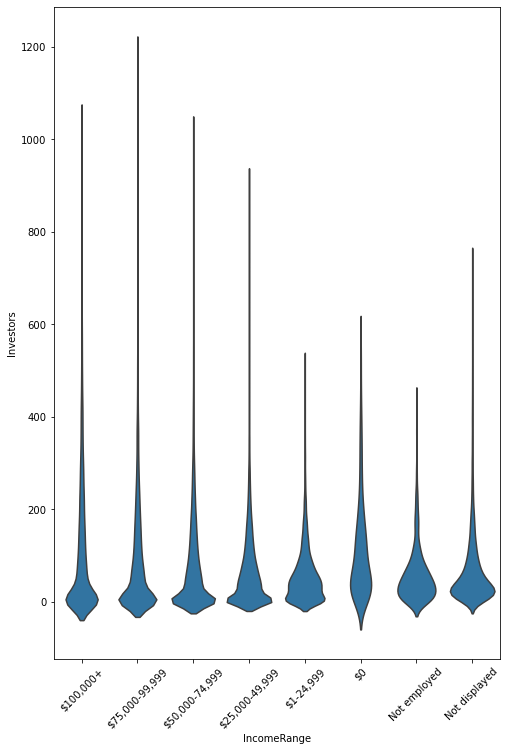

In [188]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8,12])
sb.violinplot(data=loan_data, x="IncomeRange", y='Investors', color = base_color, inner = None);
plt.xticks(rotation = 45);

### Observation:
The violin plots of the various income brackets shows there isnt really a monotonic relationship between number of investors and the income range of loan applicants

## What loan applicant can give hint to why people default on their loans?

### Borrowers Rate

### Question: Can we attribute the tendency of a loan applicant to default on their payment from their Borrower Rate?

### Visualisation:

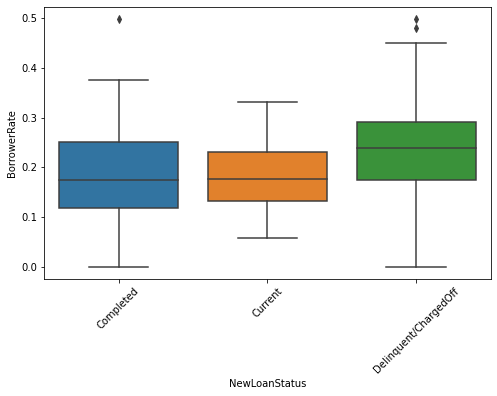

In [189]:
#Lump all categories that indicate loan payment default at different degrees together
loan_cat_index = loan_data["LoanStatus"].value_counts().index
top2 = loan_cat_index[:2]
top2.tolist()
loan_data['NewLoanStatus'] = loan_data["LoanStatus"].apply(lambda x: x if x in top2 else "Delinquent/ChargedOff")

## Box plot showing the borrowers rate of the three categories of loan status
plt.figure(figsize=[8, 5])
sb.boxplot(data = loan_data, x = 'NewLoanStatus', y = "BorrowerRate")
plt.xticks(rotation = 45);

### Observation:
Comparing loan applicants who have completed their loan payment with those who defaulted at various degress, it is observed as suspected that the average rate of those who defaulted is higher than than the loan applicants who completed their payment. The interquartile range of the boxplot also covers the range of the y axis showing that we also have loan applicants from all borrower rate range defaulting on their payment. This is an interesting observation we have noticing since we started exploring the dataset.

### Question: Are principal losses based on prosper ratings?

### Visualisation:

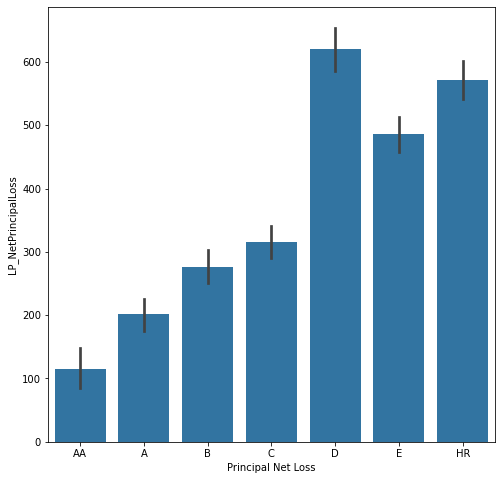

In [190]:

plt.figure(figsize=(8,8))
base_color = sb.color_palette()[0];
sb.barplot(data=loan_data,  y = 'LP_NetPrincipalLoss', x = "ProsperRating (Alpha)", color = base_color);
plt.xlabel("Principal Net Loss");

### Observation:
The net principal loss increases as the ratings go from better to worse

### Custom Risk Score

### Question: How does risk score influence/affect the tendency to default on loan payment?
The shape of the delinquent/chargedoff category shows higher probability of loan applicants having their score rating between 4 and 7 with the median around 5 while the shape of the completed category shows high probability around higher ratings between 7 and 10.

### Visualisation:

Text(0, 0.5, 'Loan Status Categories')

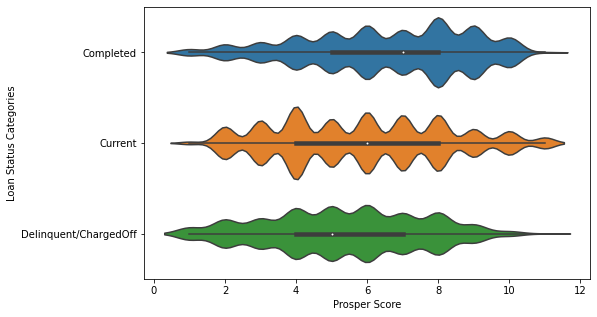

In [191]:
plt.figure(figsize=[8, 5])
sb.violinplot(data = loan_data, y = 'NewLoanStatus', x = "ProsperScore")
plt.xticks(rotation = 0);
plt.xlabel("Prosper Score");
plt.ylabel("Loan Status Categories")

### Observation:
The shape of the delinquent/chargedoff category shows higher probability of loan applicants having their score rating between 4 and 7 with the median around 5 while the shape of the completed category shows high probability around higher ratings between 7 and 10.

### Prosper Ratings

### Question: How does prosper ratings influence/affect the tendency to default on loan payment?

Comparing the Delinquent/ChargedOff category for all ratings from best to worst, we find something very interesting. We notice a constant increase in percentage of loan applicants who defaulted on their loans. 

### Visualisation:

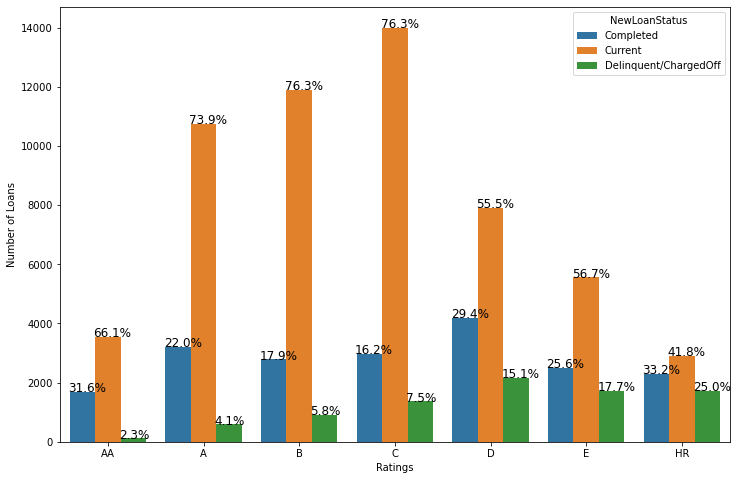

In [192]:
# with_hue function will plot percentages on the bar graphs 
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts(sort = False).values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)
            
plt.figure(figsize=[12, 8])
ax = sb.countplot(data = loan_data, hue = 'NewLoanStatus', x = "ProsperRating (Alpha)")
plt.xticks(rotation = 0);
plt.xlabel("Ratings");
plt.ylabel("Number of Loans")

with_hue(ax, loan_data["ProsperRating (Alpha)"], 7, 3)

### Observation
Comparing the Delinquent/ChargedOff category for all ratings from best to worst, we find something very interesting. We notice a constant increase in percentage of loan applicants who defaulted on their loans

### Question: Are investors giving preference to loan applicants with better ratings?
A constant drop in the average number of investors as we move from loan applications with the best ratings to the worst shows that investors are more likely to invest in loan applications with higher ratings.

### Visualisation:

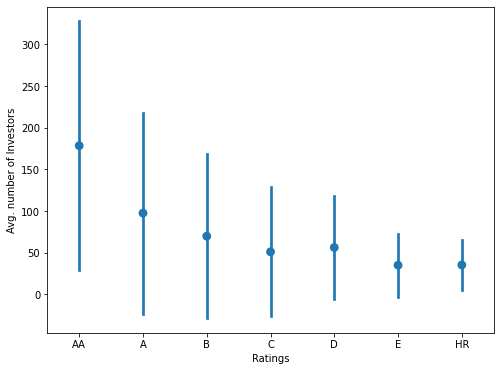

In [193]:
plt.figure(figsize=(8,6))
sb.pointplot(data=loan_data, x='ProsperRating (Alpha)', y='Investors', color=base_color, ci='sd', linestyles="");
plt.ylabel('Avg. number of Investors');
plt.xlabel("Ratings");

### Observation:
We notice a constant drop in the average number of investors as we move from loan applications with the best ratings to the worst.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrowers Rate and Lenders yield are highly correlated, confirming my assumption that they almost mean the same thing. Borrowers rate interestingly is negatively correlated with the prosper score and mildly correlated with number of investors. This suggest some form of relationship among these variables. Looking further, the box plot of borrowers rate showed that the best prosper scores were associated with lower rates. Also, a similar observation was also noticed in the relationship between the borrowers rate and prosper ratings, as the ratings went from best to the worst, the rates also incresed steadily. 
   


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>There was also some interesting relationship observed when investigating possible reasons why loan applicants default on their loans. From the violin plot we see that applicantsthat default on their loans having their score rating between 4 and 7 with the median around 5 while those who completed their loans  shows high probability around higher ratings between 7 and 10.

> A point plot of investors and ratings shows a relationship that tells us that investors are wary of investing in loan applicants with low ratings. We notice a constant drop in the average number of investors as we move from loan applications with the best ratings to the worst.

## Multivariate Exploration



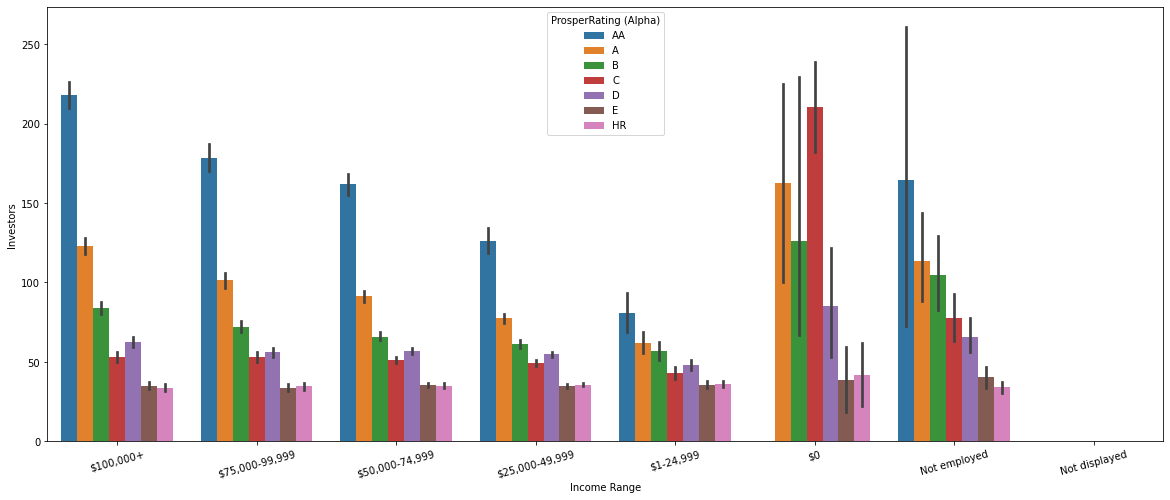

In [194]:
plt.figure(figsize=(20,8))
sb.barplot(data=loan_data, x = 'IncomeRange', y = 'Investors', hue = "ProsperRating (Alpha)");
plt.xticks(rotation=15);
plt.ylabel('Investors');
plt.xlabel("Income Range");

### Principal Net Loss across different ratings and income ranges

We observe that loan applicants with no income contributed extremely to the loss in most ratings categories. This is also supported by the notable spikes(standard deviation) on the bars signifying no income.

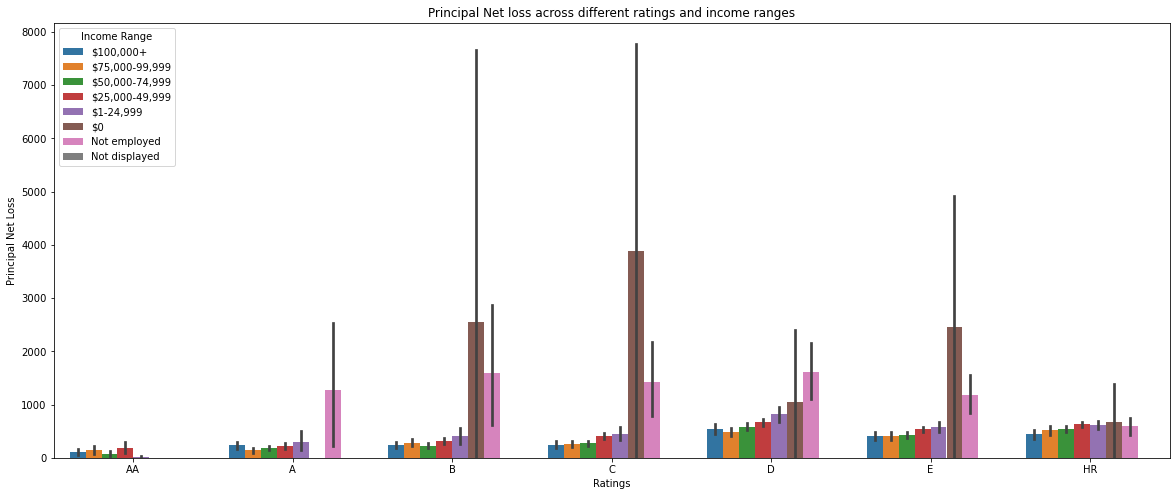

In [195]:
plt.figure(figsize=(20,8))
sb.barplot(data=loan_data,  y = 'LP_NetPrincipalLoss', x = "ProsperRating (Alpha)", hue = "IncomeRange")
plt.legend(title="Income Range", loc = "upper left");
plt.ylabel('Principal Net Loss');
plt.xlabel("Ratings");
plt.title("Principal Net loss across different ratings and income ranges");

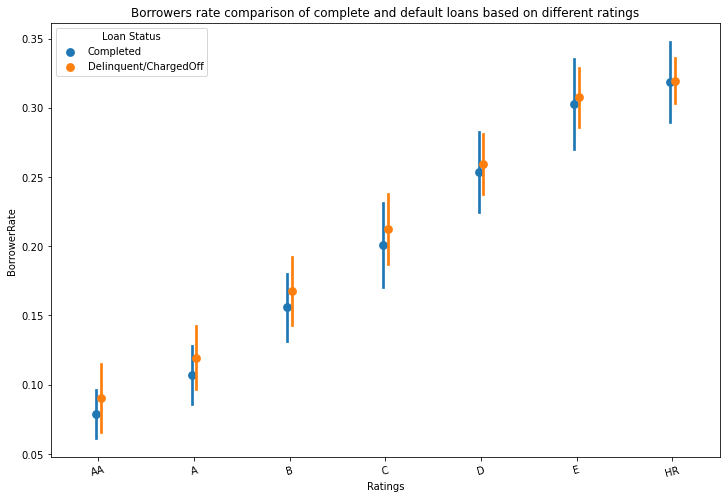

In [196]:

loan_status_without_current = loan_data[loan_data["LoanStatus"] != "Current"]

plt.figure(figsize=(12,8))
sb.pointplot(data=loan_status_without_current, hue = 'NewLoanStatus', y = 'BorrowerRate', x = "ProsperRating (Alpha)", ci='sd',
             linestyles="", dodge = True)
plt.xticks(rotation=15);
plt.xlabel("Ratings");
plt.legend(title="Loan Status");
plt.title("Borrowers rate comparison of complete and default loans based on different ratings");

<Figure size 864x576 with 0 Axes>

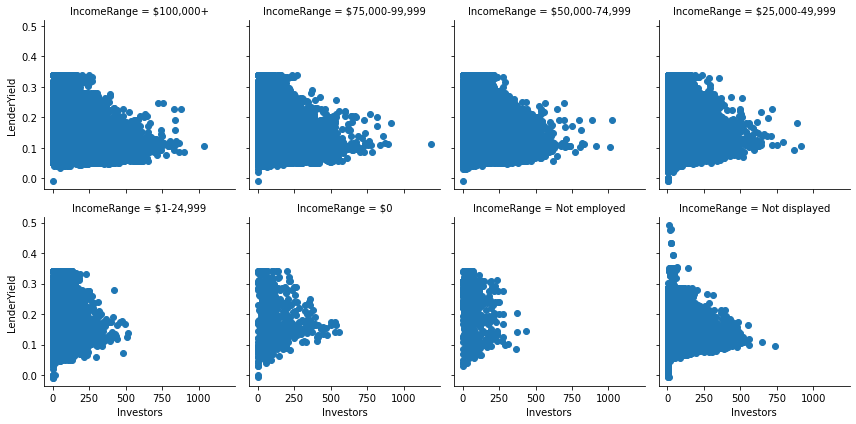

In [197]:
color = 'inferno_r'
plt.figure(figsize=(12,8))
g = sb.FacetGrid(data = loan_data, col = 'IncomeRange', col_wrap = 4,
                margin_titles = True);
g.map(plt.scatter,'Investors', 'LenderYield');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A deeper look into the borrowers rate and ratings of shows some form of uniformity across the ratings. We observe that the rate for applicants who defaulted was always higher than those who completed their loans across all ratings
Looking further into the relationship between principal net loss and ratings, we added the income range variable. This produced some interesting insights. It is observed that loan applicants with no income contributed extremely to the loss in most ratings categories with high standard deviation.



## Conclusions
> A deep look at the some variables like borrowers rate and some ratings used to classify loan applicants should influence decisions in whether the applicants got a lot of investors and also whether they are likely to pay back their loans. Other loan applicants features also showed some already established trend. One important insights is that most loan are collected to pay off previous loans.

>First off, we examined some of the variables of interest individually and observed their distribution. After which we deep dived further by investigating the relationship between two variables to provide more insights and give answers to the questions asked. Finally, we looked at multivariate exploration to further investigate these variables.
